# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------
Authors: Margaux Filippi & Maureen Fonseca

---------------------------------------------------------------------------------------------------------------------

<h1> Step 2: calculate different metrics for each modulating factor </h1>
    
This notebook is the second part of the Step1_Curate_IUCN_RedList.ipynb

<h2> Modulating Factor 4: Vulnerability of Species  </h2>

Indexes that can work:
- WEGE
- EDGE
- STAR
- (...)

<h2> Data needed for this project </h2>

To be completed!

### Importing libraries

In [2]:
import geopandas as gpd

In [3]:
import numpy as np
import pandas as pd

In [4]:
import os
import glob

In [5]:
from shapely.geometry import Polygon, Point

In [6]:
import fiona; #help(fiona.open)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import timeit

In [9]:
from netCDF4 import Dataset
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

OEF functions

In [10]:
from marinebiodiversity_utils import *

<h1> 2.1. Load data </h1>

<h2> 2.1.1 Get the conservation area</h2>

Mostly for plotting.

<h3> Coordinates for Cocos Island </h3>

Cocos Island is located at 05°31′41″N; 87°03′40″W

In [11]:
Cocos_lat = 5+31/60+41/3600
Cocos_lon = -(87+3/60+40/3600)
Cocos = Point(Cocos_lon, Cocos_lat)

<h3> Import entire ACMC </h3>

ACMC is the acronyms for the entire conservation area: Cocos Marine Conservation Area

In [12]:
ACMC = gpd.read_file('../Data/Geospatial_ACMC/ACMC.shp')

Inspect the Coordinate Reference Systems (CRS).

In [13]:
ACMC = ACMC.set_crs(epsg=4326, allow_override=True)

In [14]:
ACMC.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<h2> 2.1.2 Get the species data </h2>

This is the outcome from `AMMB_IUCN_step1_curatedata.ipynb`.

In [16]:
df = gpd.read_file('../Data/ACMC_IUCN_data/gdf_ACMC_IUCN_range_status_filtered.shp') 

In [17]:
df.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,redlistCat,scientific,geometry
0,13,1504292,177964,Ctenochaetus marginatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,Least Concern,Ctenochaetus marginatus,"MULTIPOLYGON (((173.90343 3.44131, 173.90535 3..."
1,62,1604964,180245,Holothuria kefersteinii,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,Data Deficient,Holothuria kefersteinii,"MULTIPOLYGON (((-117.10683 32.44577, -117.1034..."
2,69,1614313,180318,Holothuria imitans,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,Least Concern,Holothuria imitans,"MULTIPOLYGON (((132.11722 -2.12133, 132.11264 ..."
3,76,1621878,180373,Isostichopus fuscus,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,Endangered,Isostichopus fuscus,"MULTIPOLYGON (((-114.81055 31.82298, -114.7885..."
4,95,1735660,183294,Strongylura exilis,1,1,1,IUCN,2018,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,Least Concern,Strongylura exilis,"MULTIPOLYGON (((-91.24865 -0.67985, -91.24889 ..."


<h1> 2.2. Preliminary calculations </h1> 

In [19]:
area_of_conservation = ACMC.geometry.item()

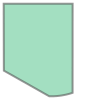

In [20]:
area_of_conservation

**We have the following conservation statuses:**

In [21]:
print("There are the following conservation statuses:")
print(df.redlistCat.unique())

There are the following conservation statuses:
['Least Concern' 'Data Deficient' 'Endangered' 'Vulnerable'
 'Near Threatened' 'Critically Endangered']


In [22]:
for status in df.redlistCat.unique():
    print("There are " + str(len(df[df.redlistCat==status])) + \
          " species with the status " + status)

There are 530 species with the status Least Concern
There are 31 species with the status Data Deficient
There are 16 species with the status Endangered
There are 37 species with the status Vulnerable
There are 10 species with the status Near Threatened
There are 3 species with the status Critically Endangered


Text(0.5, 1.0, 'Plot 1: Species Conservation Status')

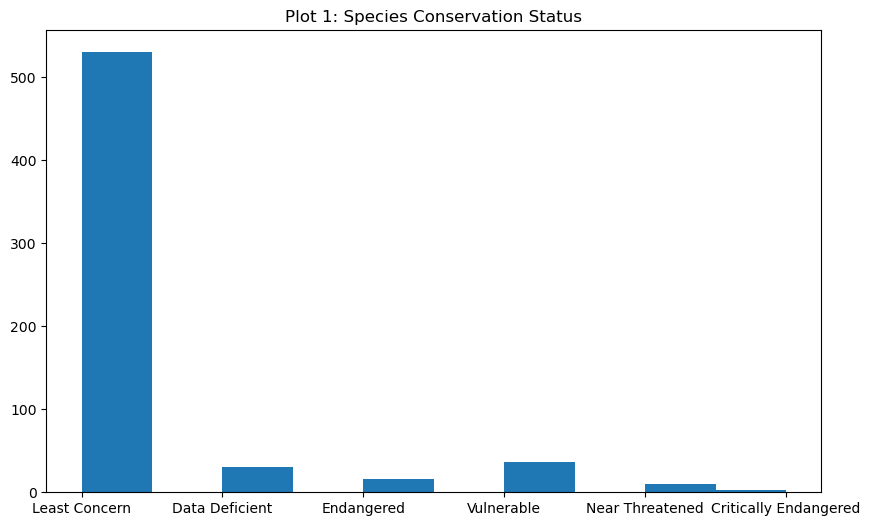

In [30]:
plt.figure(figsize=(10,6))
plt.hist(df.redlistCat)
plt.title('Plot 1: Species Conservation Status')

In [31]:
print("The species with the status Critically Endangered are :")
print(df[df.redlistCat=='Critically Endangered'].BINOMIAL)

The species with the status Critically Endangered are :
553    Carcharhinus longimanus
560     Eretmochelys imbricata
618            Pristis pristis
Name: BINOMIAL, dtype: object


- *Carcharhinus longimanus* is Oceanic whitetip shark
- *Eretmochelys imbricata* is Hawksbill sea turtle
- *Pristis pristis* is Largetooth sawfish

TO BE COMPLETED!